In [1]:
import os
import pandas as pd

def load_housing_data():
    csv_path = "housing/housing.csv"
    return pd.read_csv(csv_path)

In [2]:
housing = load_housing_data()
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
#info() method for getting quick and useful description of the data
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing["ocean_proximity"].value_counts()


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


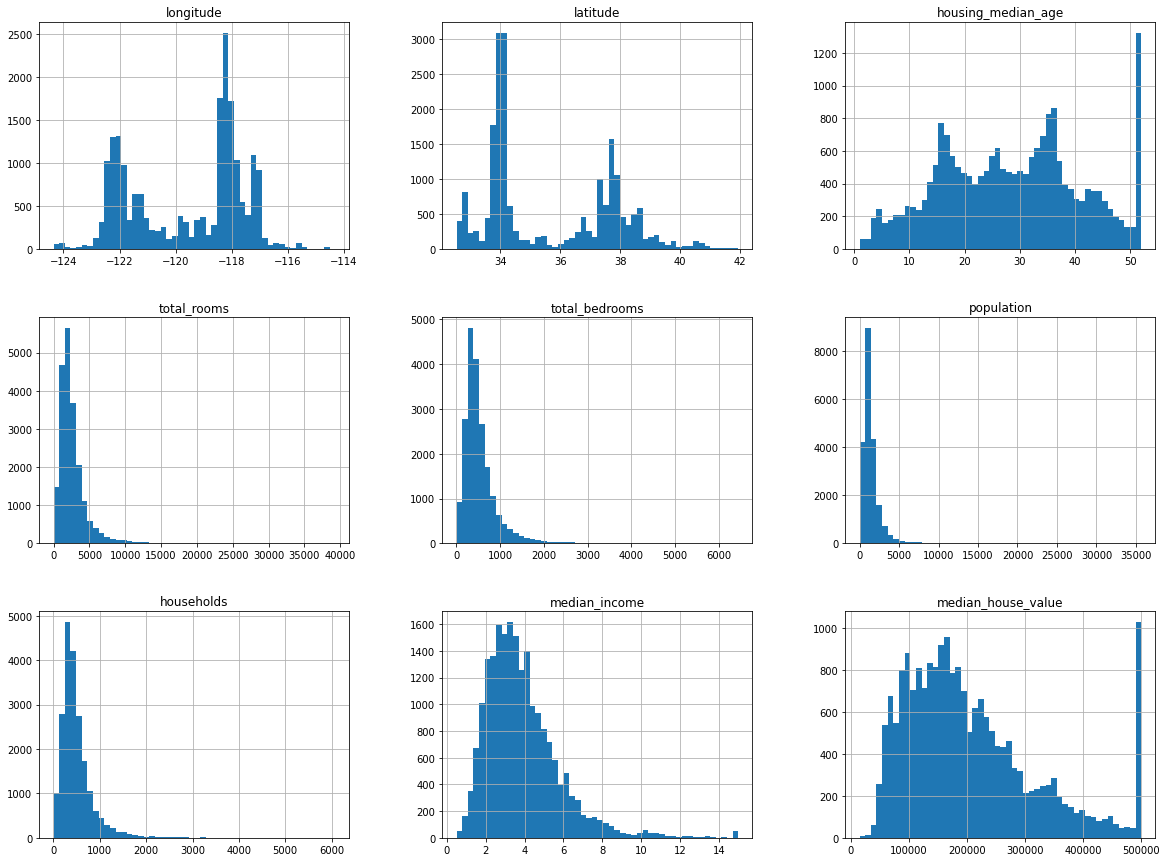

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
#test_ratio 20% -> 0.2 of whole data
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [8]:
#test_indices is all data until :test_set_size; train_indices is everythings left from that point on [test_set_size:]

In [9]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [10]:
len(test_set)

4128

In [11]:
#Not a good solution because it will always shuffle the indices so that you dont have consitent results

In [12]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [13]:
#Scikit-Learn provides functions to split data set for testing and for training
#test_size is in % how much off the data should % should be provided for testing, rest of it is training 
#instaling train_set , test_set = train_test_split()
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
#Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls
#https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split

In [16]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [17]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


<AxesSubplot:>

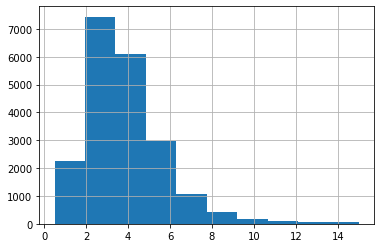

In [18]:
housing["median_income"].hist()


In [19]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1, 2, 3, 4., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [20]:
housing["income_cat"].value_counts()

5    8087
4    5150
3    4946
2    2298
1     159
Name: income_cat, dtype: int64

<AxesSubplot:>

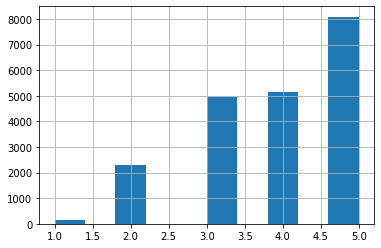

In [21]:
housing["income_cat"].hist()

In [22]:
#housing["median_income"].hist(bins=50, figsize=(20,4))

In [23]:
#If such a behaviour apears in the histogramm, 
# where you can see that the most amount of data points are between 1.5 and 6.5
# bins=amount of bars inzusammehang mit der breite
# so it makes more sense to pick that specific part you can look at


In [24]:
#StratifiedShuffleSplit
#stratified sampling data divided into homogeneous subgroups called strata
#split data so that it is logical and startisfied for example population with %Female %Male 

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [25]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

5    0.391715
4    0.249516
3    0.239583
2    0.111434
1    0.007752
Name: income_cat, dtype: float64

In [26]:
housing.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [27]:
#What usefull information can we take to predict median_housing price strat median_income
housing["income_cat"].value_counts() / len(housing)

5    0.391812
4    0.249516
3    0.239632
2    0.111337
1    0.007703
Name: income_cat, dtype: float64

In [28]:
#strat data wird genutzt um die labeld test data so gut wie möglich die reale wiederspiegelt.. bei dem vergleich
#sieht man, dass die strat data genauer ist als die zufällig gewählten punkte
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [29]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.007703,0.007752,0.007994,3.773585,0.628931
2,0.111337,0.111434,0.112888,1.392515,0.087032
3,0.239632,0.239583,0.243702,1.698342,-0.020218
4,0.249516,0.249516,0.256783,2.912621,0.000000
5,0.391812,0.391715,0.378634,-3.363423,-0.024731


# Visualize Data

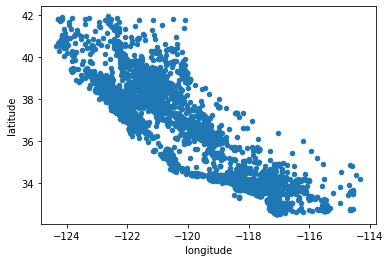

In [30]:
housing = strat_train_set.copy() 
#easy made copieng of dataset 

housing.plot(kind="scatter", x="longitude", y="latitude")
plt.savefig("bad_visualization_plot", dpi='figure')

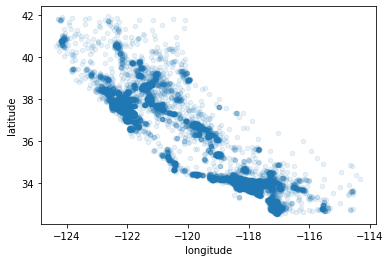

In [31]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.savefig("better_visualization_plot", dpi='figure')

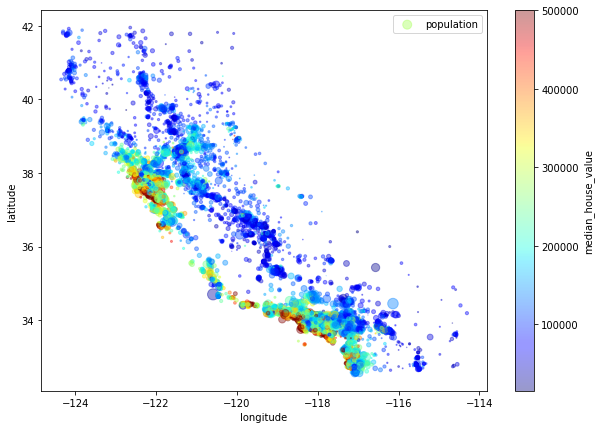

In [32]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
plt.savefig("housing_prices_scatterplot")


# Looking for Corroletion between data

In [33]:
corr_matrix = housing.corr()

In [34]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690163
total_rooms           0.141468
housing_median_age    0.101851
households            0.071419
total_bedrooms        0.054276
population           -0.020020
longitude            -0.043065
latitude             -0.147961
Name: median_house_value, dtype: float64

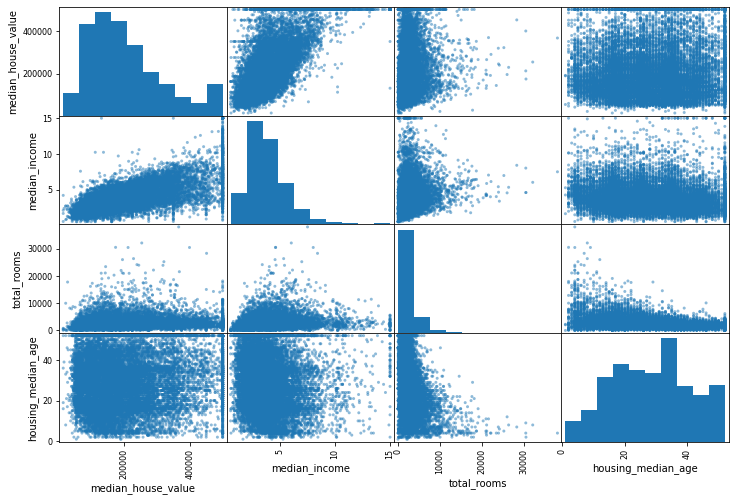

In [35]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.savefig("scatter_matrix_plot")

Basicly a 4x4 Matrix with instead of numbers you have a certain data set 


# Prepare the Data for Machine Learning Algorithms

In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In [ ]:
housing

In [ ]:
housing_labels

# Data Cleaning

In [54]:
#3 options to clean data dropna, drop with median, skl learn has a function that does median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [55]:
#Remove the text attribute because median can only be calculated on numerical attributes
housing_num = housing.drop("ocean_proximity", axis=1)

In [56]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [57]:
imputer.statistics_

array([-118.53  ,   34.27  ,   29.    , 2118.    ,  432.    , 1158.    ,
        407.    ,    3.5403,    4.    ])

In [60]:
#Check that this is the same as manually computing the median of each attribute:
housing_num.median().values

/var/folders/nd/m768yz4903s3h9r9ydy_j3mw0000gn/T/ipykernel_18807/1701892004.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  housing_num.median().values


array([-118.53  ,   34.27  ,   29.    , 2118.    ,  432.    , 1158.    ,
        407.    ,    3.5403])

In [51]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()

In [52]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing.index)
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
19071,-122.53,38.32,22.0,3577.0,432.0,1371.0,501.0,5.7950,5.0
5751,-118.27,34.17,52.0,2010.0,432.0,908.0,326.0,6.9135,5.0
17840,-121.89,37.44,8.0,2534.0,432.0,1527.0,364.0,7.8532,5.0
2301,-119.78,36.82,25.0,5016.0,432.0,2133.0,928.0,3.6250,4.0
20069,-120.37,38.01,30.0,473.0,432.0,242.0,93.0,2.5417,3.0


# Handling Text and Categorical Attributes

In [179]:
#if u have categorical input features like in this case ocean_proximity
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17275,NEAR OCEAN
6402,INLAND
9468,<1H OCEAN
20449,<1H OCEAN
3206,INLAND
8859,<1H OCEAN
562,NEAR BAY
9224,INLAND
1535,NEAR BAY
4659,<1H OCEAN


In [180]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[4.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [3.],
       [1.],
       [3.],
       [0.]])

In [181]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [182]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot
#By default, the OneHotEncoder class returns a sparse array,
#but we can convert it to a dense array if needed by calling the toarray() method:

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [183]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

# Transformation Pipelines 


In [176]:
#Like Vector Transformation, they allow you to scale, rotate and translate the objects in your scene.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [177]:
housing_num_tr

array([[-0.04949427, -0.59541988,  0.82270508, ..., -0.67837195,
        -0.35653501, -0.85277837],
       [ 0.78244611, -0.70736928,  0.42527883, ..., -0.86099418,
        -0.78595637, -0.6523547 ],
       [-2.09696432,  1.76484652,  0.34579358, ..., -0.36451867,
        -0.1984658 , -1.02568056],
       ...,
       [-1.33476744,  1.05116913,  1.45858709, ..., -0.66460646,
        -0.53041115,  1.30949685],
       [ 0.62801406, -0.72602751,  1.29961659, ...,  0.12461524,
         0.29945223, -0.93744372],
       [-1.32978576,  1.00918811,  0.90219033, ..., -0.91146766,
        -0.88870136, -1.53524829]])

In [184]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [185]:
housing_prepared

array([[-0.04949427, -0.59541988,  0.82270508, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.78244611, -0.70736928,  0.42527883, ...,  0.        ,
         0.        ,  0.        ],
       [-2.09696432,  1.76484652,  0.34579358, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.33476744,  1.05116913,  1.45858709, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.62801406, -0.72602751,  1.29961659, ...,  0.        ,
         0.        ,  0.        ],
       [-1.32978576,  1.00918811,  0.90219033, ...,  0.        ,
         1.        ,  0.        ]])

# Training the Training Set

In [186]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [187]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Result:", lin_reg.predict(some_data_prepared))

Result: [227442.66865182 136362.4938333  172526.10281277 206985.84120042
 124037.60112488]


In [188]:
print("Labels:", list(some_labels))

Labels: [281300.0, 252800.0, 93600.0, 182100.0, 70200.0]


# Evaluate System on the Test Set

In [190]:
from sklearn.metrics import mean_squared_error
final_model = lin_reg

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [193]:
final_rmse

70355.17710120782